In [3]:
!unzip "drive/My Drive/Covid 19 Week 5/covid19-global-forecasting-week-5.zip" -d "drive/My Drive/Covid 19 Week 5/Data"

Archive:  drive/My Drive/Covid 19 Week 5/covid19-global-forecasting-week-5.zip
  inflating: drive/My Drive/Covid 19 Week 5/Data/submission.csv  
  inflating: drive/My Drive/Covid 19 Week 5/Data/test.csv  
  inflating: drive/My Drive/Covid 19 Week 5/Data/train.csv  


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df_train = pd.read_csv("drive/My Drive/Covid 19 Week 5/Data/train.csv")
df_train.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              969640 non-null  int64  
 1   County          880040 non-null  object 
 2   Province_State  917280 non-null  object 
 3   Country_Region  969640 non-null  object 
 4   Population      969640 non-null  int64  
 5   Weight          969640 non-null  float64
 6   Date            969640 non-null  object 
 7   Target          969640 non-null  object 
 8   TargetValue     969640 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 66.6+ MB


In [7]:
df_train.isna().sum()

Id                    0
County            89600
Province_State    52360
Country_Region        0
Population            0
Weight                0
Date                  0
Target                0
TargetValue           0
dtype: int64

In [8]:
df_train[df_train["County"].notnull()][:3]

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
67760,67761,Autauga,Alabama,US,55869,0.091485,2020-01-23,ConfirmedCases,0
67761,67762,Autauga,Alabama,US,55869,0.914848,2020-01-23,Fatalities,0
67762,67763,Autauga,Alabama,US,55869,0.091485,2020-01-24,ConfirmedCases,0


In [ ]:
# Countries with top 10 population
population_wise = df_train.Population.groupby(df_train["Country_Region"]).max().sort_values(ascending= False)
top10_population = pd.DataFrame()
top10_population["Population"] = population_wise.iloc[:10]
top10_population["Country"] = population_wise.index[:10]
top10_population    

,Population,Country
Country_Region,,
China,1395773400,China
India,1295210000,India
US,324141489,US
Indonesia,258705000,Indonesia
Brazil,206135893,Brazil
Pakistan,194125062,Pakistan
Nigeria,186988000,Nigeria
Bangladesh,161006790,Bangladesh
Russia,146599183,Russia


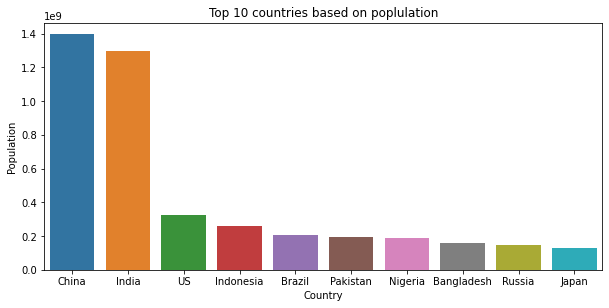

In [ ]:
# Top 10 countries with highest poplulation graph
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
sns.barplot(x="Country", y= "Population", data=top10_population )
plt.title("Top 10 countries based on poplulation");
plt.xlabel("Country")
plt.ylabel("Population");

In [7]:
df1 = df_train[df_train["Target"]== "ConfirmedCases"]
len(df1)

484820

In [8]:
# countries with most confirmed covid cases
df2 = df1.TargetValue.groupby(df1["Country_Region"]).sum().sort_values(ascending = False)
df_confirmed = pd.DataFrame()
df_confirmed["ConfirmedCases"] = df2[:10]
df_confirmed["Country"]= df2.index[:10]
df_confirmed    

,ConfirmedCases,Country
Country_Region,,
US,5979962,US
Brazil,772416,Brazil
Russia,493023,Russia
United Kingdom,291588,United Kingdom
India,276583,India
Spain,242280,Spain
Italy,235763,Italy
Peru,208823,Peru
Canada,197414,Canada


In [ ]:
# countries with most covid fatalities
df3 = df_train[df_train["Target"]=="Fatalities"]
df4 = df3.TargetValue.groupby(df3["Country_Region"]).sum().sort_values(ascending= False)
df_deaths= pd.DataFrame()
df_deaths["Deaths"] = df4[:10]
df_deaths["Country"]= df4.index[:10]
df_deaths

,Deaths,Country
Country_Region,,
US,337252,US
United Kingdom,41213,United Kingdom
Brazil,39680,Brazil
Italy,34114,Italy
France,29322,France
Spain,27136,Spain
Canada,16074,Canada
Mexico,15357,Mexico
Belgium,9629,Belgium


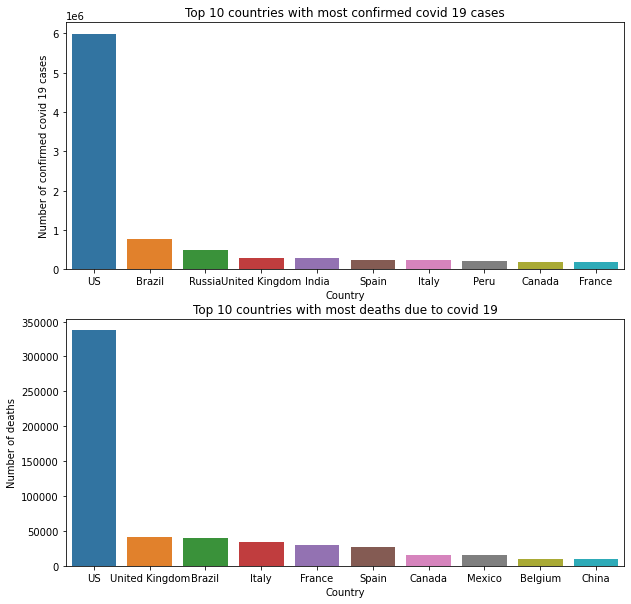

In [ ]:
# plot confirmed and deaths due to covid 19 - top 10
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.barplot(x= "Country", y= "ConfirmedCases", data= df_confirmed);
plt.title("Top 10 countries with most confirmed covid 19 cases")
plt.xlabel("Country")
plt.ylabel("Number of confirmed covid 19 cases");
plt.subplot(2,1,2)
sns.barplot(x= "Country", y= "Deaths", data= df_deaths);
plt.title("Top 10 countries with most deaths due to covid 19")
plt.xlabel("Country")
plt.ylabel("Number of deaths");

In [9]:
listMaxConfirmed10 = []
for country in df_confirmed["Country"]:
  listMaxConfirmed10.append(country)

listMaxConfirmed10

['US',
 'Brazil',
 'Russia',
 'United Kingdom',
 'India',
 'Spain',
 'Italy',
 'Peru',
 'Canada',
 'France']

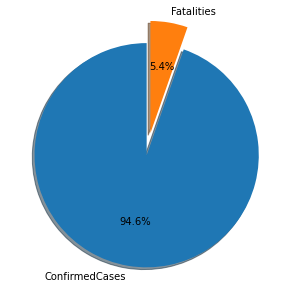

In [ ]:
# Confirmed cases VS fatalities all around the world
df5 = df_train.TargetValue.groupby(df_train["Target"]).sum()
labels = [df5.index[0], df5.index[1]]
sizes= [df5[0], df5[1]]
explode= (0, 0.2)
plt.figure(figsize=(5,5))
plt.pie(sizes, explode = explode, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show();

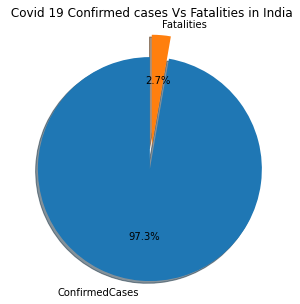

In [ ]:
# In India Confirmed Vs Deaths due to Covid 19 until June 10, 2020
df6 = df_train[df_train["Country_Region"]== "India"].TargetValue.groupby(df_train["Target"]).sum()
labels = [df6.index[0], df6.index[1]]
sizes= [df6[0], df6[1]]
explode= (0, 0.2)
plt.figure(figsize=(5,5))
plt.pie(sizes, explode = explode, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title(" Covid 19 Confirmed cases Vs Fatalities in India")
plt.show();

In [10]:
df_input = pd.read_csv("drive/My Drive/Covid 19 Week 5/Data/train.csv", parse_dates=["Date"])
#Parsing Date column from object to DateTime type

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_input.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Id              969640 non-null  int64         
 1   County          880040 non-null  object        
 2   Province_State  917280 non-null  object        
 3   Country_Region  969640 non-null  object        
 4   Population      969640 non-null  int64         
 5   Weight          969640 non-null  float64       
 6   Date            969640 non-null  datetime64[ns]
 7   Target          969640 non-null  object        
 8   TargetValue     969640 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 66.6+ MB


In [11]:
df_trainCopy = df_input

In [12]:
df_trainCopy["Month"] = pd.DatetimeIndex(df_trainCopy["Date"]).month
df_trainCopy["Day"] = pd.DatetimeIndex(df_trainCopy['Date']).day
df_trainCopy[:2]

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue,Month,Day
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0,1,23
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0,1,23


In [13]:
df_trainCopy_confirmed = df_trainCopy[df_trainCopy["Target"]== "ConfirmedCases"]
df_trainCopy_confirmed[:2]

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue,Month,Day
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0,1,23
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0,1,24


In [14]:
df6 = pd.DataFrame()
for country in listMaxConfirmed10:
  df6 = df6.append(df_trainCopy_confirmed[df_trainCopy_confirmed["Country_Region"]== country])

In [18]:
df6["Country_Region"].value_counts()

US                447720
Canada              1820
United Kingdom      1540
France              1540
Peru                 140
India                140
Russia               140
Spain                140
Italy                140
Brazil               140
Name: Country_Region, dtype: int64

In [15]:
df_trend= pd.DataFrame()
df7 = pd.DataFrame()
df8 = pd.DataFrame()
for country in listMaxConfirmed10:
  df7 = df6[df6["Country_Region"]== country]
  df7= df7.TargetValue.groupby(df7["Month"]).sum()
  df8["Month"]= df7.index 
  df8["Cases"]= df7
  df8["Country"]= country
  df_trend = df_trend.append(df8)

In [20]:
df_trend[:7]

,Month,Cases,Country
0,1,NaN,US
1,2,6.0,US
2,3,17.0,US
3,4,557927.0,US
4,5,2641014.0,US
5,6,2153456.0,US
0,1,NaN,Brazil


In [ ]:
'''
The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly 
Express or PX. Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures.
'''
import plotly.express as px

In [ ]:
px.line(df_trend, x = "Month", y="Cases", color="Country", hover_name="Country",title= "Preogression of Covid-19")

In [21]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Month    60 non-null     int64  
 1   Cases    50 non-null     float64
 2   Country  60 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [16]:
# Creating features and target
df_X = df_trainCopy.copy()
df_X[:2]

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue,Month,Day
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0,1,23
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0,1,23


In [18]:
df_X.to_csv("drive/My Drive/Covid 19 Week 5/Saved/original.csv")

In [30]:
df_load = pd.read_csv("drive/My Drive/Covid 19 Week 5/Saved/original.csv")
df_load.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      969640 non-null  int64  
 1   Id              969640 non-null  int64  
 2   County          880040 non-null  object 
 3   Province_State  917280 non-null  object 
 4   Country_Region  969640 non-null  object 
 5   Population      969640 non-null  int64  
 6   Weight          969640 non-null  float64
 7   Date            969640 non-null  object 
 8   Target          969640 non-null  object 
 9   TargetValue     969640 non-null  int64  
 10  Month           969640 non-null  int64  
 11  Day             969640 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 88.8+ MB


In [31]:
df_load.drop(columns=["Unnamed: 0", "Id", "County", "Province_State", "Date"], axis = 1, inplace=True)
df_load[:2]

,Country_Region,Population,Weight,Target,TargetValue,Month,Day
0,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,23
1,Afghanistan,27657145,0.583587,Fatalities,0,1,23


In [22]:
#  # Label encoding to convert all data to numerical data
#  from sklearn.preprocessing import OneHotEncoder
#  from sklearn.compose import ColumnTransformer
#  categorical_features = ['Country_Region', 'Target']
#  oneHot =OneHotEncoder()
#  transformer = ColumnTransformer([("one_hot", oneHot, categorical_features)],
#                                  remainder = 'passthrough')
#  transformed_X = transformer.fit_transform(df_X)

In [32]:
# Finding string columns in features dataset
for label, content in df_load.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Country_Region
Target


In [36]:
# Turning string feature columns into categories
for label, content in df_load.items():
  if pd.api.types.is_string_dtype(content):
    df_load[label] = content.astype('category').cat.as_ordered()

In [37]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Country_Region  969640 non-null  category
 1   Population      969640 non-null  int64   
 2   Weight          969640 non-null  float64 
 3   Target          969640 non-null  category
 4   TargetValue     969640 non-null  int64   
 5   Month           969640 non-null  int64   
 6   Day             969640 non-null  int64   
dtypes: category(2), float64(1), int64(4)
memory usage: 39.8 MB


In [35]:
pd.Categorical(df_load.Target).codes

array([0, 1, 0, ..., 1, 0, 1], dtype=int8)

In [38]:
#Turning category into numbers in features columns
for label, content in df_load.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_load[label]= pd.Categorical(content).codes+1 

In [39]:
df_load[:2]

,Country_Region,Population,Weight,Target,TargetValue,Month,Day
0,1,27657145,0.058359,1,0,1,23
1,1,27657145,0.583587,2,0,1,23


In [43]:
# Saving the numerical features dataset
df_load.to_csv("drive/My Drive/Covid 19 Week 5/Saved/numerical.csv", index= False)

In [47]:
df_num = pd.read_csv("drive/My Drive/Covid 19 Week 5/Saved/numerical.csv")
df_num[:2]

,Country_Region,Population,Weight,Target,TargetValue,Month,Day
0,1,27657145,0.058359,1,0,1,23
1,1,27657145,0.583587,2,0,1,23


In [51]:
# Features 
df_X = df_num.drop(['TargetValue'], axis = 1)
df_X[:2]

,Country_Region,Population,Weight,Target,Month,Day
0,1,27657145,0.058359,1,1,23
1,1,27657145,0.583587,2,1,23


In [53]:
df_Y = df_num["TargetValue"]
df_Y[:2]

0    0
1    0
Name: TargetValue, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Creating training and validation set
np.random.seed(42)
X_train, X_val, y_train, y_val = train_test_split(df_X, df_Y, test_size = 0.2)

In [57]:
# importing and training model
np.random.seed(42)

reg = RandomForestRegressor(n_jobs= -1)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
# Saving the trained model
import pickle
pickle.dump(reg, open("drive/My Drive/Covid 19 Week 5/SavedModels/Model_saved.sav", 'wb'))

In [61]:
# Load saved trained model
loaded_model = pickle.load(open("drive/My Drive/Covid 19 Week 5/SavedModels/Model_saved.sav", 'rb'))

In [63]:
score = loaded_model.score(X_val,y_val)
score

0.934948038881589

In [65]:
# importing Test dataset
df_test = pd.read_csv("drive/My Drive/Covid 19 Week 5/Data/test.csv", parse_dates=["Date"])

In [68]:
df_test[:2]

,ForecastId,County,Province_State,Country_Region,Population,Weight,Date,Target
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-27,Fatalities


In [69]:
# adding Day and month columns
df_test["Month"] = pd.DatetimeIndex(df_test["Date"]).month
df_test["Day"] = pd.DatetimeIndex(df_test['Date']).day

In [71]:
df_Test_X = df_test.drop( ["ForecastId", "County", "Province_State", "Date"], axis = 1)
df_Test_X[:2]

,Country_Region,Population,Weight,Target,Month,Day
0,Afghanistan,27657145,0.058359,ConfirmedCases,4,27
1,Afghanistan,27657145,0.583587,Fatalities,4,27


In [72]:
df_Test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311670 entries, 0 to 311669
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country_Region  311670 non-null  object 
 1   Population      311670 non-null  int64  
 2   Weight          311670 non-null  float64
 3   Target          311670 non-null  object 
 4   Month           311670 non-null  int64  
 5   Day             311670 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 14.3+ MB


In [74]:
# Converting string columns to categorical
for label, content in df_Test_X.items():
  if pd.api.types.is_string_dtype(content):
    df_Test_X[label] = content.astype('category').cat.as_ordered()

In [75]:
# Converting category to numbers
for label,content in df_Test_X.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_Test_X[label] = pd.Categorical(content).codes+1

In [76]:
df_Test_X[:2]

,Country_Region,Population,Weight,Target,Month,Day
0,1,27657145,0.058359,1,4,27
1,1,27657145,0.583587,2,4,27


In [77]:
# Predictiong for test data
predictions = loaded_model.predict(df_Test_X)

In [78]:
list_pred = [int(x) for x in predictions]

list_pred[:2]

[142, 5]

In [79]:
pred_df = pd.DataFrame({'ForecastID':df_test.ForecastId,'Predictions': list_pred })
pred_df[:2]

,ForecastID,Predictions
0,1,142
1,2,5


In [82]:
Q05 = pred_df.groupby('ForecastID')['Predictions'].quantile(q=0.05).reset_index()
Q50 = pred_df.groupby('ForecastID')['Predictions'].quantile(q=0.5).reset_index()
Q95 = pred_df.groupby('ForecastID')['Predictions'].quantile(q=0.95).reset_index()

Q05.columns=['number','0.05']
Q50.columns=['number','0.5']
Q95.columns=['number','0.95']

In [85]:
Q95[:2]

,number,0.95
0,1,142.0
1,2,5.0


In [86]:
concat_df = pd.concat([Q05, Q50['0.5'], Q95['0.95']], axis=1)
concat_df.head(4)

,number,0.05,0.5,0.95
0,1,142.0,142.0,142.0
1,2,5.0,5.0,5.0
2,3,134.0,134.0,134.0
3,4,2.0,2.0,2.0


In [101]:
'''
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other 
columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ 
and ‘value’.
'''
sub_df = pd.melt(concat_df, id_vars=['number'], value_vars=['0.05','0.5','0.95'])
sub_df.head()

,number,variable,value
0,1,0.05,142.0
1,2,0.05,5.0
2,3,0.05,134.0
3,4,0.05,2.0
4,5,0.05,120.0


In [103]:
sub_df["ForecastId_Quantile"] = sub_df["number"].astype(str)+"_"+ sub_df["variable"]
sub_df["TargetValue"] = sub_df["value"]
sub_df[:2]

,number,variable,value,ForecastId_Quantile,TargetValue
0,1,0.05,142.0,1_0.05,142.0
1,2,0.05,5.0,2_0.05,5.0


In [105]:
sub_df = sub_df[["ForecastId_Quantile", "TargetValue"]]
sub_df[:2]

,ForecastId_Quantile,TargetValue
0,1_0.05,142.0
1,2_0.05,5.0


In [107]:
sub_df.reset_index(drop = True, inplace=True)
sub_df.head(2)

,ForecastId_Quantile,TargetValue
0,1_0.05,142.0
1,2_0.05,5.0


In [108]:
sub_df.to_csv("drive/My Drive/Covid 19 Week 5/Saved/submission.csv", index = False)

In [109]:
submission_df = pd.read_csv("drive/My Drive/Covid 19 Week 5/Saved/submission.csv")
submission_df[:2]

,ForecastId_Quantile,TargetValue
0,1_0.05,142.0
1,2_0.05,5.0
